In [ ]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
Global seed set to 0


In [2]:
import muon

In [3]:
import os

import matplotlib as mpl

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (7,7)
import seaborn as sns

In [4]:
sample_list = []
for s in os.listdir('../../../data/'):
    if s.startswith('lib_'):
        sample_list.append(s)
sample_list

['lib_09',
 'lib_55',
 'lib_54',
 'lib_34',
 'lib_15',
 'lib_29',
 'lib_56',
 'lib_23',
 'lib_38',
 'lib_36',
 'lib_51',
 'lib_57',
 'lib_10']

In [5]:
adata = sc.read(f'objects/atac_clusters.h5ad')

In [173]:
aggr = pd.read_csv('../../data/AGG/outs/aggr.csv')
aggr['sufix'] = aggr.index
aggr.index = aggr['library_id']

In [172]:
values = []
for i in sample_list:
    df = pd.read_csv(f'ATAC/AMULET_outs/{i}/MultipletBarcodes_01.txt', sep='\t', header=None)
    df[0] = [b.split('-')[0]+'-'+str(aggr.loc[i,'sufix']) for b in df[0]]
    values += list(df[0])

In [23]:
adata.obs['Multiplets_AMULET'] = [i in values for i in adata.obs.index]
adata.obs['Multiplets_AMULET_int'] = [int(i in values) for i in adata.obs.index]

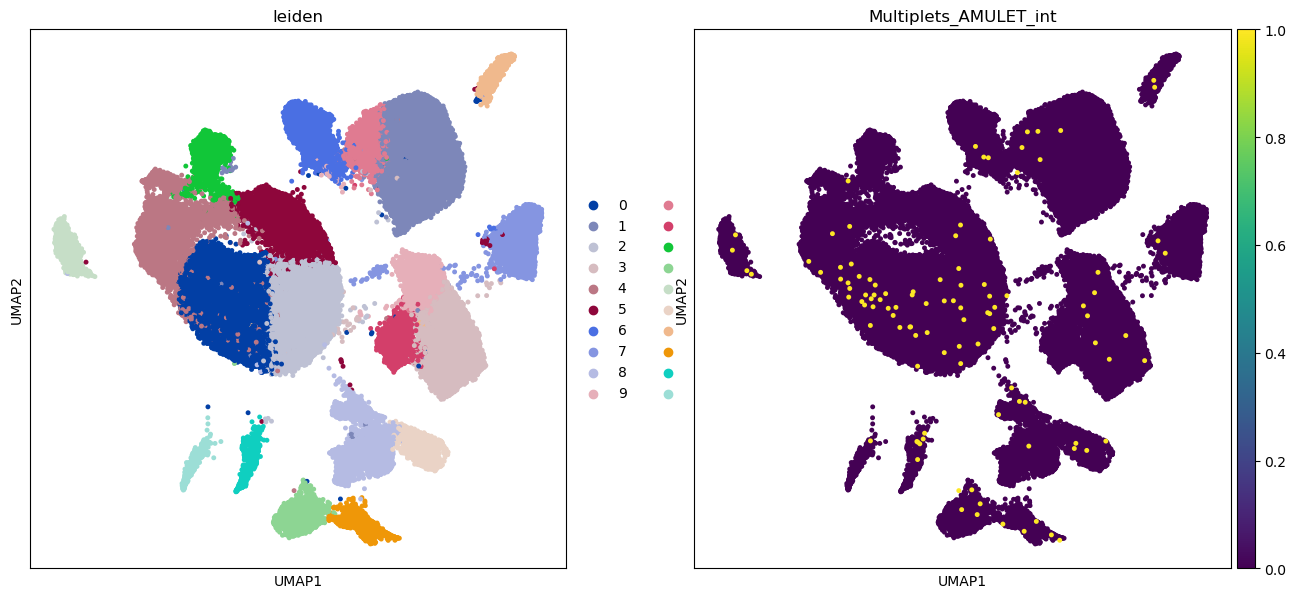

In [25]:
sc.pl.umap(adata, color=['leiden','Multiplets_AMULET_int'], size = 50)